In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import re
import powerlaw
from mplstyle import set as set_mplstyle
set_mplstyle("Fira Sans")
#from scipy.stats import powerlaw

In [2]:
def convert_to_kg(weight_str):
    if (
        pd.isna(weight_str)
        or "-" in weight_str
        or ">" in weight_str
        or "<" in weight_str
        or "~" in weight_str
        or "ca." in weight_str
    ):  # ignore nans and cases with '-', '>' or '<'
        return np.nan
 
    if weight_str in ["> 2 t",
       "> 30 t",
       "45 - 50 kg",
       "~ 256 kg",
       "100 mg",
       "~ 100 g",
       "ca. 15800",
       "ca. 50000",
       "3 mg",
       "> 1 kg",
       "8.8.kg",
       "> 100 kg",
       "6109 G",
       "ca. 12000",
       "ca. 5000",
       "ca. 45000",
       "1000 - 1100 kg",
       "> 360 kg",
       "> 1 t",
       "10.8kg",
       "~ 1 kg",
       "> 200 kg",
       "> 18 g",
       "400 - 500 g",
       "> 490 g",
       "> 55 g",
       "30 - 40 kg",
       "144 mg",
       "5 - 10 kg",
       "1.5 - 2 kg",
       "> 150 kg",
       "missing",
       "600 - 900 kg",]:
        return np.nan
 
    # use regular expressions to capture the numeric part and the unit
    match = re.match(r"(\d*\.?\d+)\s*(\w+)", weight_str)
    if not match:
        raise ValueError(f"Cannot parse weight: {weight_str}")
 
    # extract the number and unit from the matched groups
    number = float(match.group(1))
    unit = match.group(2)
 
    # convert to kg based on the unit
    if unit == "mg":
        return number / 1000000  # milligrams to kg
    if unit == "g":
        return number / 1000  # grams to kg
    elif unit == "kg":
        return number  # already in kg
    elif unit == "t":
        return number * 1000  # tonnes to kg
    else:
        raise ValueError(f"Unknown unit: {unit}")

In [9]:
data = pd.read_csv("metcat.csv")
# data = data.loc[data.loc[:, "Country"] == "USA"]
data["Weight"] = data["Recovered weight"].apply(convert_to_kg)

w = data["Weight"].to_numpy()
w = w[~np.isnan(w)]
w_pl = powerlaw.Fit(w)

Calculating best minimal value for power law fit
/home/santa/miniforge3/envs/geostat/lib/python3.11/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


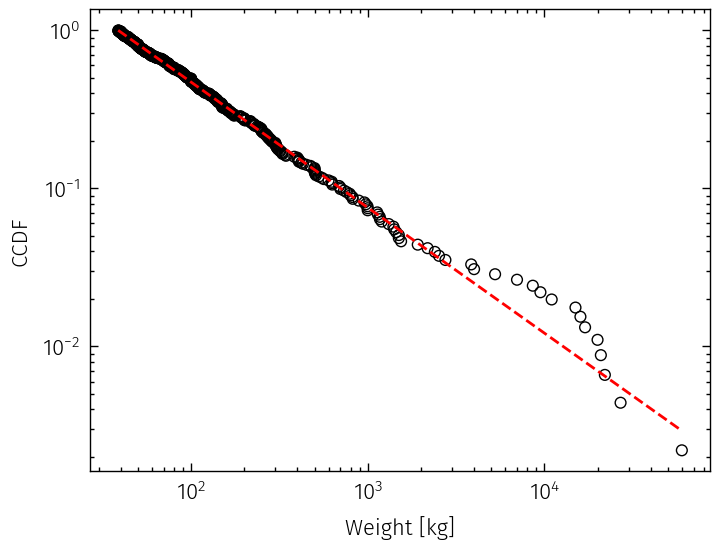

In [10]:
fig, ax = plt.subplots(figsize=(4,3))
w.sort()
mask = (w > w_pl.xmin)
w = w[mask]
F = np.arange(1, len(w)+1)/(len(w) + 1)
ax.scatter(w,1-F, ec='k', fc='None', s=15, linewidth=0.5)
w_pl.power_law.plot_ccdf(color='r', linestyle='--', ax=ax)
ax.set_xlabel('Weight [kg]')
ax.set_ylabel('CCDF')
#w_pl.plot_ccdf(ax=ax)
plt.show()